In [433]:
# Initialize Otter
import otter
grader = otter.Notebook("cs109a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 5: Predicting College Admissions

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

<hr style="height:2.4pt">

In [434]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [435]:
# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data exploration using train and basic models [16 pts]**](#part1)

- [**Question 2: Interpretable modeling [18 pts]**](#part2)

- [**Question 3: Harvard and Yale? [30 pts]**](#part3)

- [**Question 4: Building predictive models for admitted [24 pts]**](#part4)

- [**Question 5: Evaluating results [12 pts]**](#part5)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `"admitted"` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test_score**: a standardized measurement of the applicant's highest ACT or SAT combined score (2400 is the maximum)
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of the applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = United States
- **sports**: a binary indicator for High School All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

**The main set of 12 predictors is:**

```python
[
    "test_score", "ap", "avg_ap", "sat_subjects", 
    "gpa", "female", "minority", "international",
    "sports", "school", "early_app", "alumni",
]
```

Please note, you may need to modify this list when fitting different models, and you will be replacing the `"school"` variable with a binary `"harvard"` variable early in the questions below.


**IMPORTANT NOTES:**

- Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).


- When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).


- Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.

---

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration using train and basic models [16 pts]</div>

[Return to contents](#contents)

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While an argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **[Question 4.1](#part4)**.


In [436]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv("data/college_admissions.csv")
np.random.seed(121)

college_train, college_test = train_test_split(
    college,
    test_size=0.2,
    random_state=121,
    shuffle=True,
    stratify=college["school"],
)

print(college.shape)
print(college_train.shape, college_test.shape)
display(college_train.head())
college_train.info()

(1871, 16)
(1496, 16) (375, 16)


,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...
1336,LODYYSRTYZ,0,2120,6,3.333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Violin Player Girl Scouts 10 year Member sold over 65...
3,OC717EAKXN,1,2400,5,5.000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 584 to 1537
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1496 non-null   object 
 1   admitted       1496 non-null   int64  
 2   test_score     1496 non-null   int64  
 3   ap             1496 non-null   int64  
 4   avg_ap         1496 non-null   float64
 5   sat_subjects   1496 non-null   int64  
 6   gpa            1496 non-null   float64
 7   female         1496 non-null   int64  
 8   minority       1496 non-null   int64  
 9   international  1496 non-null   int64  
 10  sports         1496 non-null   int64  
 11  school         1496 non-null   object 
 12  early_app      1496 non-null   int64  
 13  alumni         1496 non-null   int64  
 14  program        1294 non-null   object 
 15  add_info       933 non-null    object 
dtypes: float64(2), int64(10), object(4)
memory usage: 198.7+ KB


In [437]:
college.describe()

,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni
count,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000,1871.000
mean,0.270,2186.932,3.455,3.730,2.872,3.881,0.506,0.206,0.060,0.035,0.175,0.050
std,0.444,167.509,2.328,1.692,1.270,0.193,0.500,0.404,0.238,0.185,0.380,0.217
min,0.000,1150.000,0.000,0.000,0.000,1.980,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,2110.000,2.000,3.500,2.000,3.840,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,2220.000,3.000,4.429,3.000,3.960,1.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,2310.000,5.000,4.857,3.000,4.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1.000,2400.000,7.000,5.000,6.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000


<div class='exercise-r'>

**Q1.1** Calculate the proportion of observations in the train data that were admitted and store this value in `prop_admitted_train`.  What would be the train and test classification accuracies for a baseline "naive" model where we classified *ALL* applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)? Store these classification accuracies in `naive_train_acc` and `naive_test_acc`.
    
**NOTE:** For this assignment, use the convention that accuracies range from 0 to 1 (to be consistant with sklearn).
    
</div>

_Points:_ 2.5

In [438]:
# your code here
# get subset of admitted students from train data
y_train = college_train["admitted"]
y_test = college_test["admitted"]


admitted_train = college_train[college_train["admitted"] == 1]

# assigning non-admit to ALL students in both datasets
y_pred_train = [0 for x in range(len(y_train))]
y_pred_test = [0 for x in range(len(y_test))]

prop_admitted_train = len(admitted_train)/len(college_train)

# accuracy =  correct predictions/total predictions
naive_train_acc = accuracy_score(y_train, y_pred_train)
naive_test_acc =  accuracy_score(y_test, y_pred_test)

In [439]:
print(f"Proportion Admitted in training Data: {prop_admitted_train:.2f}")
print("Naive Classification Model Based on Training Proportions")
print(f"\tTrain Accuracy: {naive_train_acc:.2f}")
print(f"\tTest Accuracy: {naive_test_acc:.2f}")

Proportion Admitted in training Data: 0.26
Naive Classification Model Based on Training Proportions
	Train Accuracy: 0.74
	Test Accuracy: 0.70


In [440]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.2** Create a binary ("dummy") variable named `"harvard"` in both the train and test DataFrames that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore how each of our 12 predictors is associated with whether or not an applicant is admitted into the college to which they applied (`admitted`). Create a separate **visual** for each of our predictors to investigate their relationship with college admissions. **Suggestion:** Place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**NOTE:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
    
</div>

_Points:_ 0

In [441]:
# Create dummy variable
# your code here
college_train['harvard'] = college_train['school'].apply(lambda x: 1 if x == "Harvard" else 0)
college_test['harvard'] = college_test['school'].apply(lambda x: 1 if x == "Harvard" else 0)

In [442]:
college_train.head(3)

,id,admitted,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard
584,JTEQOV7ZCB,0,2080,5,4.400,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign Language Honor Society PresidentMerit award in Socia...,1
1817,I03PV24OHY,1,2190,6,3.667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marching concert jazz and orchestral ensembles 30 hrs wee...,0
1308,K42SAOUYJJ,0,2140,2,4.500,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch Summer Film WorkshopNational Honors Society World ...,0


In [443]:
X_train, X_test = college_train, college_test

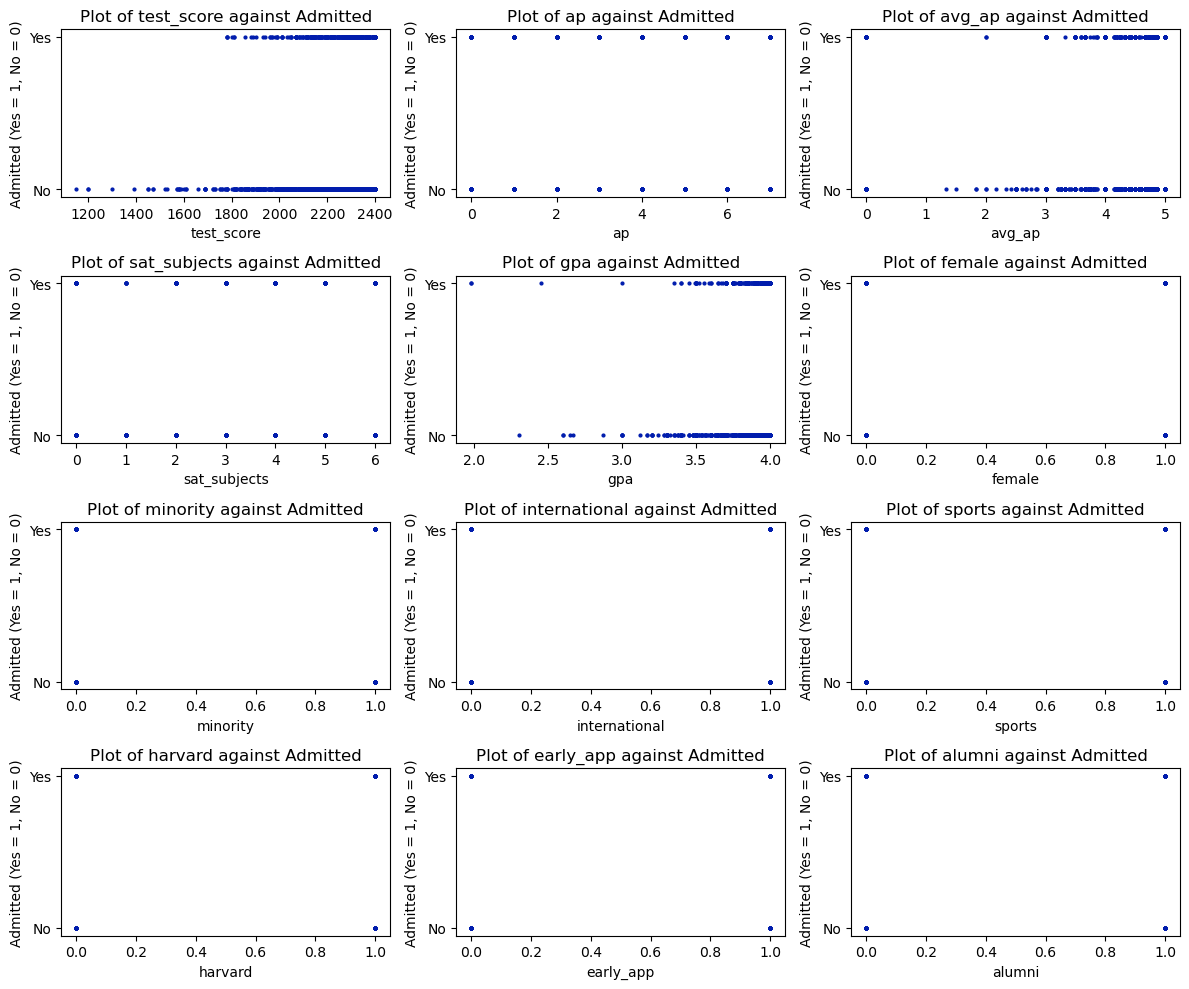

In [444]:
# Heders of predictors of interest
predictors = [
    "test_score", "ap", "avg_ap", "sat_subjects", 
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni"
]
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12,10))
axs = axs.ravel()

for i, p in enumerate(predictors):
    axs[i].plot(college_train[p], college_train['admitted'], 'o', markersize=2,color="#011DAD",label="Data")
    # Make a plot of the response (insuranceclaim) vs the predictor (age)
    axs[i].set_xlabel(p)
    axs[i].set_ylabel('Admitted (Yes = 1, No = 0)')
    axs[i].set_title(f'Plot of {str(p)} against Admitted')
    axs[i].set_yticks((0,1), labels=('No', 'Yes'))

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

In [445]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
    
</div>

_Points:_ 1.5

Based on the visual, there are 3 predictors with continuous values potentially predicting admitted - test_score, avg_ap, and gpa. From these three with potential to plot a sigmoid line for logistic regression, test_score seems to be the best predictor as the plots have smaller variances. Admission == 1 clusters on right of the x-axis, and admission == 0 is more evenly scattered than the other 2 top potential predictors. In contrast, avg_ap and gpa have more outlier points, which is undesirable in choosing the best potential predictor. All the other 9 predictors might be unsuitable as the dotplots are separated at the 4 plot corners - which makes sense as they are binary, categorical, and ordinal variables.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>
    
**Q1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  
- Store the coefficient and intercept in `logit1_4_coef` and `logit1_4_intercept`. Interpret these values.
- What are the estimated probabilities of getting into each school? Store these in `p_harvard` and `p_yale`. Which school is easier to get into according to this model?

**IMPORTANT:** Remember, all models in this assignment should be **unregularized** unless you are specifically asked to use regularization for a particular model.
</div>

_Points:_ 2

According to this model, Harvard is easier to get into, with a higher probability than into Yale (`p_harvard` > `p_yale`). To support this, if harvard = 1 and yale = 0, then application to harvard (X == 1) is associated with a e^(B1)) = e^0.1532 = 1.1655 times the odds of admission than applying to Yale.

In [446]:
# your code here
x_train = college_train[['harvard']]
y_train = college_train['admitted']

# Fit logistic regression model without regularization
logit1_4 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)

# Identify and report coefficients
logit1_4_coef = logit1_4.coef_[0][0]
logit1_4_intercept = logit1_4.intercept_[0]
# Calculate and report probabilities
p_harvard = logit1_4.predict_proba([[1]])[0][1]
p_yale = logit1_4.predict_proba([[0]])[0][1]

c:\Users\sykri\anaconda3\envs\cs109a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\sykri\anaconda3\envs\cs109a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [447]:
odds = np.exp((logit1_4_coef))
print(f"If harvard = 1 and yale = 0, then there is a e^(-(B0+B1)) = e^{(logit1_4_coef):.4f} = {odds:.4f} times the odds of admission into harvard")

If harvard = 1 and yale = 0, then there is a e^(-(B0+B1)) = e^0.1532 = 1.1655 times the odds of admission into harvard


In [448]:
print(
    "The coefficient for the 'logit1_4' model's only predictor 'harvard' "
    "is {:.4f} and the intercept is {:.4f}\n".format(
        logit1_4_coef, logit1_4_intercept
    )
)

print(
    "Estimated probability of acceptance for Harvard: {:.4f}"
    .format(p_harvard)
)
print(
    "Estimated probability of acceptance for Yale: {:.4f}"
    .format(p_yale)
)

The coefficient for the 'logit1_4' model's only predictor 'harvard' is 0.1532 and the intercept is -1.1137

Estimated probability of acceptance for Harvard: 0.2768
Estimated probability of acceptance for Yale: 0.2472


In [449]:
grader.check("q1.4")

q1.4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.5** Create and display a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope). Show this calculation using $\LaTeX$ in a markdown cell.
    
**Hint:** The Pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) method may be helpful here.

</div>

_Points:_ 3

First, we calculate probabilities with `logit1_4`'s coefficients.

Let $z = \beta_0 + \beta_1 x_1 + \dots +\beta_p x_p$

where $\beta_0 = -1.1137$

and $\beta_1 = 0.1532$

Our logistic regression formula is: 

$$\hat{p}= \dfrac{e^{z}}{1+e^{z}}$$

This is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-z}}$$

$z = -1.1137 + 0.1532*X_1$

$X_1 = [harvard]$

With final formula:

$$\hat{p}= \dfrac{1}{1+e^{-(-1.1137 + 0.1532*[harvard] )}}$$

if $[harvard] = 1$

$$\hat{p}=0.2768$$

if $[harvard] = 0$

$$\hat{p}=0.2472$$

This is supported by the contingency table:

\begin{array}{c:ccccccc}
Admitted/Harvard & Not-Admitted & Admitted \\ \hline
Yale & 536 & 176 \\
Harvard & 567 & 217 \\ 

\end {array}

where,

$$\dfrac{Admitted\ to\ School}{(Admitted\ to\ School\ + Not\ Admitted\ to\ School)}$$

With probabilities of admission into each school calculated as:

Harvard 

$p[harvard] = 217/(217+567) = 0.2768$

Yale

$p[yale] = 176/(176+536) = 0.2472$

We can conclude that contiungency table calculations are similar to regression formula output.

In [450]:
# your code here
pd.crosstab(college_train['harvard'], college_train['admitted'])

admitted,0,1
harvard,,
0,536,176
1,567,217


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
    
</div>

_Points:_ 2

The overall acceptance rate is much much lower for both Harvard and Yale, at around 4.5% and 5.9%, respectively. In fact, unlike our calculations, Harvard is actually HARDER to get into than Yale. Our calculations of ~27% and ~24% is grossly inaccurate.

<!-- END QUESTION -->

---

<a id="part2"></a>

## <div class='exercise'>Question 2: Interpretable modeling [18 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q2.1** 
    
- Fit a logistic regression model to predict `admitted` from `test_score` alone. Call it `logit2_1`.
- Store the learned parameters in `logit2_1_beta0` and `logit2_1_beta1`. 
- Store the train and test classification accuracies for this model in `acc_train_logit2_1` and `acc_test_logit2_1`.
    
</div>

_Points:_ 3

In [451]:
# your code here
x_train = college_train[['test_score']]
x_test = college_test[['test_score']]
y_train = college_train['admitted']
y_test = college_test['admitted']

logit2_1 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)

y_pred_train = logit2_1.predict(x_train)
y_pred_test = logit2_1.predict(x_test)

logit2_1_beta0 = logit2_1.intercept_[0]
logit2_1_beta1 = logit2_1.coef_[0][0]


acc_train_logit2_1 = accuracy_score(y_train, y_pred_train)
acc_test_logit2_1 = accuracy_score(y_test, y_pred_test)

In [452]:
logit2_1_intercept, logit2_1_coef_test = logit2_1_beta0, logit2_1_beta1

In [453]:
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_1_coef_test))

print(
    "\nThe classification accuracies for 'logit2_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}".format(
        acc_train_logit2_1, acc_test_logit2_1
    )
)
# END SOLUTION

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test                0.0038

The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013


In [454]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise-r'>

**Q2.2**
    
- What is the estimated probability of an applicant being admitted with an *average* `test` score of 2250? Store this in `prop_test_2250`.
- What about if they had a perfect test score of 2400? Store this in `prop_test_2400`.
- What test score would be needed to have a 50-50 chance (i.e. 0.5 probability) of being admitted? Store this in `test_50_50`.
    
</div>

_Points:_ 4

The logit2_1 model can be used to predict the p(admission) for various test scores. An average test score of 2250 leads to a ~29.3% probability of admission, whereas a perfect test score of 2400 increases the probability to ~42.3%. The score where there'd be a 50-50 chance is predicted to be 2482, which is unrealistic, as the max for `test_score` is 2400.

In [455]:
# your code here
prob_test_2250 = logit2_1.predict_proba([[2250]])[0][1]
prob_test_2400 = logit2_1.predict_proba([[2400]])[0][1]

test_50_50 = (np.log(0.5/0.5) - logit2_1_intercept)/logit2_1_coef_test

c:\Users\sykri\anaconda3\envs\cs109a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\sykri\anaconda3\envs\cs109a\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [456]:
# your code here
print(
    "The estimated chances of an applicant being admitted with "
    "the following two 'test' scores:\n\n\tscore\tprobabilities"
    "\n\t2250\t{:.4f}\n\t2400\t{:.4f}\n"
    .format(prob_test_2250, prob_test_2400)
)

print(
    "The test score required to have a 50-50 chance of being "
    "admitted is approximately:\n\n\t{:.2f}"
    .format(test_50_50)
)
# END SOLUTION

The estimated chances of an applicant being admitted with the following two 'test' scores:

	score	probabilities
	2250	0.2929
	2400	0.4226

The test score required to have a 50-50 chance of being admitted is approximately:

	2482.34


In [457]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<div class='exercise-r'>

**Q2.3** Fit a logistic regression model to predict `admitted` from `test_score` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates along with the classification accuracies for this model (on both train and test data).
    
</div>

_Points:_ 3

In [458]:
# your code here

x_train = college_train[["test_score", "avg_ap"]]
x_test = college_test[["test_score", "avg_ap"]]
y_train = college_train['admitted']
y_test = college_test['admitted']

logit2_3 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)

logit2_3_coef_test = logit2_3.coef_[0][0]
logit2_3_coef_avg_ap = logit2_3.coef_[0][1]
logit2_3_intercept = logit2_3.intercept_[0]

y_pred_train = logit2_3.predict(x_train)
y_pred_test = logit2_3.predict(x_test)

acc_train_logit2_3 = accuracy_score(y_train, y_pred_train)
acc_test_logit2_3 = accuracy_score(y_test, y_pred_test)

In [459]:
# Print the parameters of logit2_3
print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)

The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test                -0.0005
	avg_ap              0.0533

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


In [460]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.4** Interpret the coefficient estimates for both predictors in `logit2_3` and compare the coefficient estimate for `test_score` to the one from `logit2_1`.  Why has this estimate changed?

You should inspect the relationship between `test_score` and `avg_ap` to help get a better sense for what might be happening here.

</div>

_Points:_ 4

In [461]:
# Print the parameters of the last 2 models
print("The intercept and coefficient for the 'logit2_1' model are:")

print("\t{:<20}{:.4f}".format('intercept', logit2_1_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_1_coef_test))

print("The intercept and coefficients for the 'logit2_3' model are:")
print("\t{:<20}{:.4f}".format('intercept', logit2_3_intercept))
print("\t{:<20}{:.4f}".format('test_score', logit2_3_coef_test))
print("\t{:<20}{:.4f}".format('avg_ap', logit2_3_coef_avg_ap))

The intercept and coefficient for the 'logit2_1' model are:
	intercept           -9.4136
	test_score          0.0038
The intercept and coefficients for the 'logit2_3' model are:
	intercept           -0.0188
	test_score          -0.0005
	avg_ap              0.0533


In `logit2_1`, a one unit change in test_score is associated with an e^0.0038 change in the odds of admission. However, this is quite a weak correlation as it is close to 0.

For `logit2_3`, the `test score` coefficient is flipped to negative, and becomes further non-significant. While a one unit increase in `avg_ap` is associated with an e^0.0533 increase in the odds of admission. `avg_ap` seems to be a better predictor of admission than `test_score`.

However, the caveat of `logit2_3`, is that plot Q2.4 below shows a slight positive relationship between `avg_ap` and `test_score` when `avg_ap` != 0/ This is supported by a correlation score of 0.376 between `avg_ap` and `test_score`. It seems like students who take more ap classes have higher test_scores.

In [462]:
college_train[["test_score", "avg_ap"]].corr()

,test_score,avg_ap
test_score,1.000,0.376
avg_ap,0.376,1.000


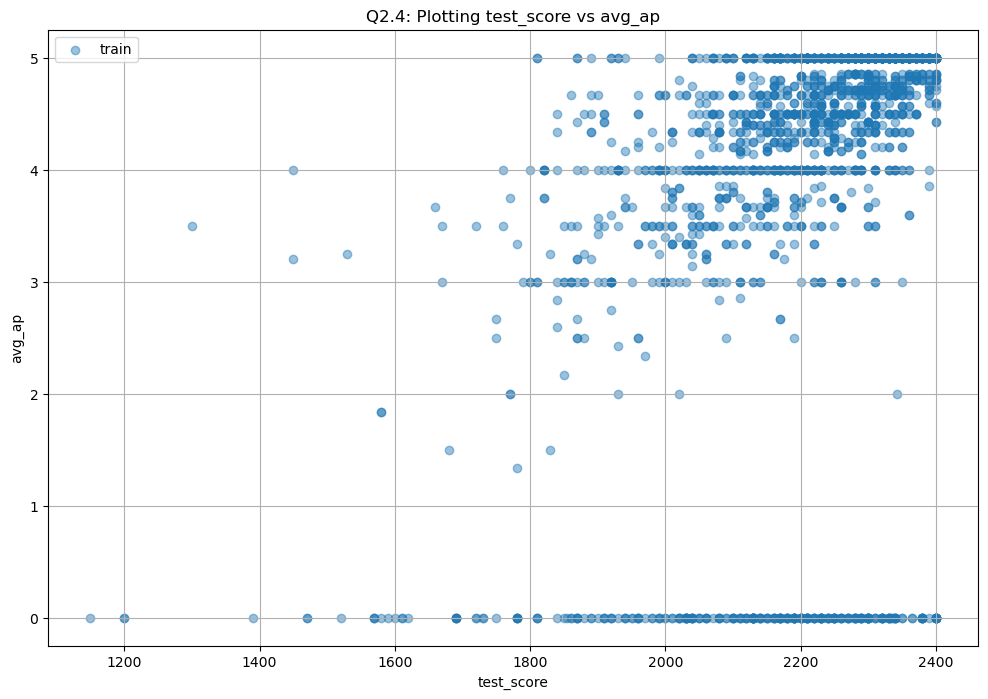

In [463]:
plt.figure(figsize=(12,8))

# plot train and testing data
plt.scatter(college['test_score'], college['avg_ap'], alpha=0.45, label='train')

# plt.scatter(x_test, y_test_pred, alpha=0.35, label='test_predicted')
plt.xlabel('test_score')
plt.ylabel('avg_ap')
plt.title(f'Q2.4: Plotting test_score vs avg_ap')
plt.legend()
plt.grid()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q2.5** Interpret and compare the classification accuracies for the two models, `logit2_1` and `logit2_3`.  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar or different.

</div>

_Points:_ 4

In [464]:
# Display accuracies of last 2 models
print(
    "\nThe classification accuracies for 'logit2_1' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_1, acc_test_logit2_1)
)
print(
    "\nThe classification accuracies for 'logit2_3' are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit2_3, acc_test_logit2_3)
)


The classification accuracies for 'logit2_1' are:

	Train	0.7373
	TEST	0.7013

The classification accuracies for 'logit2_3' are:

	Train	0.7373
	TEST	0.7013


Despite the diffrences in number of predictors, both accuracies for `logit2_1` and `logit2_3` are similar! They are similar since the additional variable avg_ap did not add predictive value to the model, due to the possible multiocollinearity between avg_ap and test_scores. Additionally, the training accuracies are higher than test, suggesting that the model does not generalize that well.

These similar accuracies are suspicious, and could also be explained by the majority of the points >73% classified as not-admitted. This data bias can affect model accuracies, leading to similar accuracies by chance.

<!-- END QUESTION -->

---

<a id="part3"></a>

## <div class='exercise'>Question 3: Harvard and Yale? [30 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.1**
- Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]`.
- Store the train and test accuracies in `acc_train_logit3_1` and `acc_test_logit3_1`.
- Use the code provided to output the coefficient estimates. Interpret the coefficients for the binary predictors in this model.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 4

In [465]:
# Print statements below assume predictors used in this order
logit3_1_predictors = ["harvard", "test_score", "ap", "avg_ap", "gpa", "female", "minority"]

Interpretations for the following binary predictors are:
- Applying to Harvard (`harvard` = 1) is associated with an e^0.06 change in the odds of admission into Harvard, while controlling other confounders (predictors)
- Females (`female` = 1) are associated with an e^0.0476 change in the odds of admission into Harvard, while controlling other confounders (predictors)
- Minorities (`minority` = 1) are associated with an e^0.6372 change in the odds of admission into Harvard, while controlling other confounders (predictors)

In [466]:
# your code here
x_train = college_train[logit3_1_predictors]
x_test = college_test[logit3_1_predictors]
y_train = college_train['admitted']
y_test = college_test['admitted']

logit3_1 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)

y_pred_train = logit3_1.predict(x_train)
y_pred_test = logit3_1.predict(x_test)

acc_train_logit3_1 = accuracy_score(y_train, y_pred_train)
acc_test_logit3_1 = accuracy_score(y_test, y_pred_test)

In [467]:
# Grab model's intercept and coefs regardless of their shape
# (which depends on how x and y were shaped)
logit3_1_intercept = np.array(logit3_1.intercept_).flatten()[0]
logit3_1_coefs = logit3_1.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_1' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_1_intercept
    )
)
for predictor, coef in zip(logit3_1_predictors, logit3_1_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit3_1' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(acc_train_logit3_1, acc_test_logit3_1)
)

The intercept and coefficients for the 'logit3_1' model are:

	intercept           -0.7303
	harvard             0.0600
	test_score          0.0027
	ap                  -0.0204
	avg_ap              0.0372
	gpa                 -1.6980
	female              0.0476
	minority            0.6372

The classification accuracies for 'logit3_1' are:

	Train	0.7306
	TEST	0.6987


In [468]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `["harvard", "test_score", "ap"]` along with the 2 interaction terms: `harvard` with `test_score` and `harvard` with `ap`. Name the columns for these interaction terms `harvard_test_score` and `harvard_ap`.

</div>

_Points:_ 3

In [469]:
# Print statement below assumes this order of predictors
logit3_2_predictors = ["harvard", "test_score", "ap", "harvard_test_score", "harvard_ap"]

In [470]:
# your code here
x_train = college_train[["harvard", "test_score", "ap"]]
x_test = college_test[["harvard", "test_score", "ap"]]
y_train = college_train['admitted']
y_test = college_test['admitted']

for df in [x_train, x_test]:
    df["harvard_test_score"] = df[["harvard", "test_score"]].apply(lambda x: x["harvard"] * x["test_score"], axis =1)
    df["harvard_ap"] = df[["harvard", "ap"]].apply(lambda x: x["harvard"] * x["ap"], axis =1)

logit3_2 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)

C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\690820655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["harvard_test_score"] = df[["harvard", "test_score"]].apply(lambda x: x["harvard"] * x["test_score"], axis =1)
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\690820655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["harvard_ap"] = df[["harvard", "ap"]].apply(lambda x: x["harvard"] * x["ap"], axis =1)
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\690820655.py:8: SettingWithCopyWarnin

In [471]:
# Display results
logit3_2_intercept = np.array(logit3_2.intercept_).flatten()[0]
logit3_2_coefs = logit3_2.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_2' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_2_intercept
    )
)

for predictor, coef in zip(logit3_2_predictors, logit3_2_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_2' model are:

	intercept           -7.1344
	harvard             -4.4410
	test_score          0.0027
	ap                  0.0240
	harvard_test_score  0.0022
	harvard_ap          -0.1101


In [472]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.3** Simplify and write out mathematically the above model from Question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test_score` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
    
**NOTE:** All of your mathematical statements should be written out in your markdown cells using $\LaTeX$. Show all your steps, not just the final result.

</div>

_Points:_ 4

Let 

$P(Y=1) = P[admitted]$

$1 - P(Y=1) = P[not\ admitted]$

The logistic regression equation for `logit3_2` model is:

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -7.1344 +\ -4.4410 (X_1) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (X_1)(X_2) +\ -0.1101(X_1)(X_3) $$

(1) Applying to Harvard $(X_1 = 1)$

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -7.1344 +\ -4.4410 (1) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (1)(X_2) +\ -0.1101(1)(X_3) $$

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -11.5754 +\ 0.0049 (X_2) +\ -0.0861(X_3) $$

(2) Applying to Yale $(X_1 = 0)$

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -7.1344 +\ -4.4410 (0) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (0)(X_2) +\ -0.1101(0)(X_3) $$

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -7.1344 +\ 0.0027 (X_2) +\ 0.0240 (X_3) $$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test_score` as a function of `ap` would an applicant be predicted to have a better than 50% chance (i.e. 0.5 probability) of being admitted into the college they applied to? 

Use the function for Harvard to answer the following question: if a student scored a perfect 2400 on `test_score`, what is the range of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

Again, you should show your work in $\LaTeX$.
</div>

_Points:_ 5

Our decision boundary is at where our algorithm hesitates when predicting which class to classify at

$P(admitted) = P(not\ admitted) = 0.5$

Translating this into our previous model `logit3_2`'s equation:

$$ \ln \left( \frac{P(admitted)}{P(not\ admitted)} \right) =\ -7.1344 +\ -4.4410 (X_1) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (X_1)(X_2) +\ -0.1101(X_1)(X_3) $$

$$ \ln \left( \frac{0.5}{0.5} \right) =\ -7.1344 +\ -4.4410 (X_1) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (X_1)(X_2) +\ -0.1101(X_1)(X_3) $$

$$ \ 0 =\ -7.1344 +\ -4.4410 (X_1) +\ 0.0027 (X_2) +\ 0.0240 (X_3) +\ 0.0022 (X_1)(X_2) +\ -0.1101(X_1)(X_3) $$

Therefore, say a person applied to Harvard $(X_1 = 1)$

$$ \ 0 =\ -11.5754 +\ 0.0049 (X_2) +\ -0.0861(X_3) $$

Solving for `test_score` $(X_2)$

$$ \ X_2 =\ \frac{ \left(11.5754 - 0.0861(X_3) \right)}{0.0049} $$

With `ap` $= X_3 = [0,1,2,3,4,5,6,7]$, 

The corresponding of `test_score`s would be $[2362.327, 2344.755, 2327.184, 2309.612, 2292.041, 2274.469, 2256.898, 2239.327]$

With a range between $(2239.327, 2362.327)$

 

On the other hand, say a person applied to Yale $(X_1 = 0)$

Solving for `test_score` $(X_2)$

$$ \ X_2 =\ \frac{ \left(7.1344 - 0.0240(X_3) \right)}{0.0027} $$

With `ap` $= X_3 = [0,1,2,3,4,5,6,7]$, 

The corresponding `test_score` would be $[2362.327, 2344.755, 2327.184, 2309.612, 2292.041, 2274.469, 2256.898, 2239.327]$

With a range between $(2580.148, 2642.370)$

In [473]:
# Calculating range of values for X_1 = 1
scores_harvard = [f"{((11.5754 - 0.0861*(i))/0.0049):.3f}" for i in range(8)]
", ".join(scores_harvard), min(scores_harvard), max(scores_harvard)

('2362.327, 2344.755, 2327.184, 2309.612, 2292.041, 2274.469, 2256.898, 2239.327',
 '2239.327',
 '2362.327')

In [474]:
# Calculating range of values for X_1 = 0S
scores_yale = [f"{((7.1344 - 0.0240*(i))/0.0027):.3f}" for i in range(8)]
", ".join(scores_yale), min(scores_yale), max(scores_yale)

('2642.370, 2633.481, 2624.593, 2615.704, 2606.815, 2597.926, 2589.037, 2580.148',
 '2580.148',
 '2642.370')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test_score` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (including both the location of the boundaries and where the points lie around these boundaries).

**NOTE:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret. It will likely take some careful work here to generate plots with data points that are clear and easy to see. You might try 'dithering' the points with a random offset so they are not all on top of one another.
    
</div>

_Points:_ 5

Comparing admitted vs non-admitted points in both plots suggest that admitted students have higher mean `test_scores` over non-admitted. Non-admitted points in blue also have more outliers with lower `test_scores`. Ideally, a good classification boundary would be where datapoints under it maximizes for non-admission and datapoints above it maximizes for admission.

In both plots, it seems like the negative sloped boundary lines suggest a negative linear relationship between `test_score` and `ap`.

The boundary line on the Harvard applicants scatterplot made sense - controlling for test_score, more ap subjects taken increases the probability of admission. The location of points around the boundaries supports harvard's low admission rate, where most admitted applicants score close to 2400.

However, the boundary line on the Yale applicants scatterplot sits way above the max test_score of 2400. Model `logit3_2` predicts that a Yale applicant with 7 ap subjects needs to score 2580 (unrealistic!) to have a better than 50% chance of admission. Thus, the boundary line is far away from any single points. This is untrue, as Yale's admission rate is comparable to Harvard's, and certainly not 0%, so we are expecting its boundary to be comparable to Harvard's.

In conclusion, Yale's scatter plot suggests that the model `logit3_2` is still inaccurate as it does relatively well with predicting admission into Harvard, but not Yale applicants.

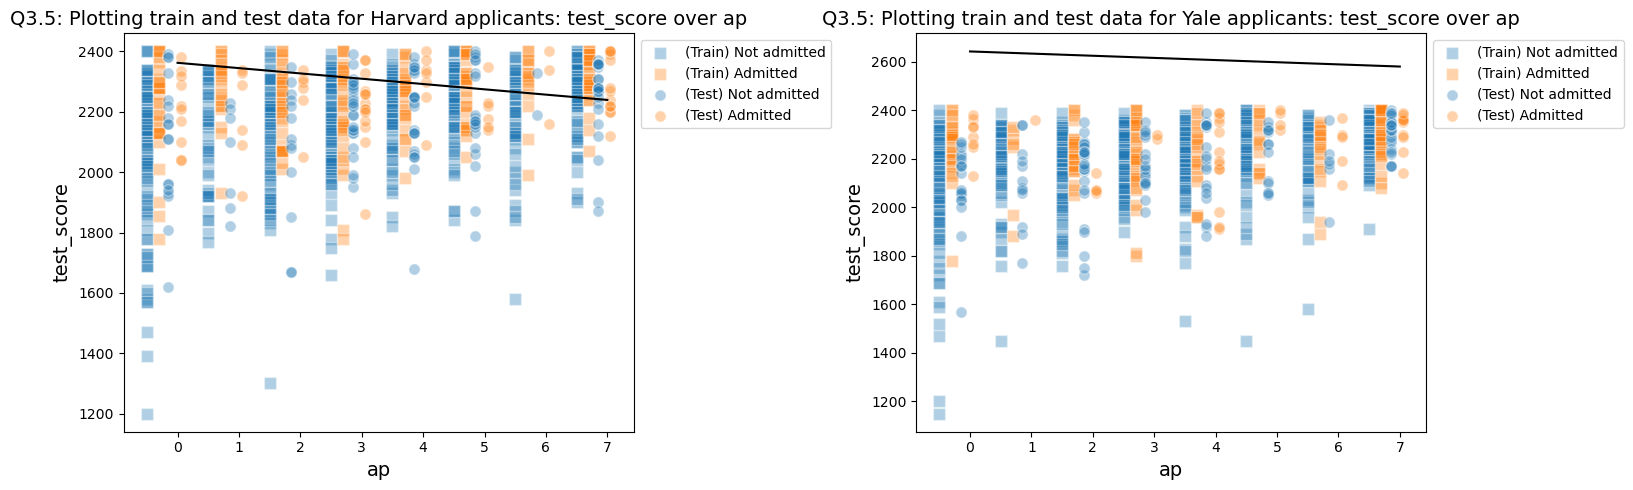

In [475]:
def plot_boundaries(ax, school):
    xx = np.linspace(0,7)
    if school == "harvard":
        yy = (11.5754 - 0.0861*(xx))/0.0049
    else:
        yy = (7.1344 - 0.0240*(xx))/0.0027

    ax.plot(xx, yy, 'k-')

def plot_model(q, school, ax, x_train, y_train, x_test, y_test):

    # Plot test_score vs ap
    names = ["Not admitted","Admitted"]
    colors = ["tab:blue", "tab:orange"]
    dithers = [1, 0.94+0.06]
    
    ps, dithers = [1,1],[-0.5,-0.3]
    for i, y_class in enumerate(set(y_train.values.flatten())):
        
        index = (y_train == y_class).values
        ax.scatter(
            ps[i]*x_train.loc[index]["ap"]+dithers[i],
            x_train.loc[index]["test_score"],
            c=colors[i],
            marker='s',
            s=65, alpha=0.35, 
            edgecolor='w',
            label=f"(Train) {names[i]}",
        )
    ps, dithers = [1,1],[-0.15,0.05]
    for i, y_class in enumerate(set(y_test.values.flatten())):
        
        index = (y_test == y_class).values
        ax.scatter(
            ps[i]*x_test.loc[index]["ap"]+dithers[i],
            x_test.loc[index]["test_score"],
            c=colors[i],
            marker='o',
            s=65, alpha=0.35, 
            edgecolor='w',
            label=f"(Test) {names[i]}",
        )
        # plot decision boundaries

    # Plot labels, legend, and titles
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    ax.set_title(f'Q{q}: Plotting train and test data for {str(school)} applicants: test_score over ap', fontsize=14)
    ax.set_ylabel('test_score', fontsize=14)
    ax.set_xlabel('ap', fontsize=14)


f, ax = plt.subplots(1, 2, figsize=(16, 5))

x_train = college_train.loc[college_train["harvard"] == 1][["harvard","test_score","ap"]]
x_test = college_test.loc[college_test["harvard"] == 1][["harvard","test_score","ap"]]
y_train = college_train.loc[college_train["harvard"] == 1]["admitted"]
y_test = college_test.loc[college_test["harvard"] == 1]["admitted"]
plot_boundaries(ax[0], "harvard")
plot_model(3.5, "Harvard",ax[0], x_train, y_train, x_test, y_test)

# scatterplot for yale applicants: test_score over admitted
x_train = college_train.loc[college_train["harvard"] == 0][["harvard","test_score","ap"]]
x_test = college_test.loc[college_test["harvard"] == 0][["harvard","test_score","ap"]]
y_train = college_train.loc[college_train["harvard"] == 0]["admitted"]
y_test = college_test.loc[college_test["harvard"] == 0]["admitted"]
plot_boundaries(ax[1], "yale")
plot_model(3.5, "Yale", ax[1], x_train, y_train, x_test, y_test)

plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<div class='exercise-r'>

**Q3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `["harvard", "test_score", "female", "minority"]` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`. 
    
</div>

_Points:_ 3

In [476]:
# Provided code assumes this order of predictors
logit3_6_predictors = ["harvard",
                       "test_score",
                       "female",
                       "minority",
                       "harvard_female",
                       "harvard_minority"
                      ]

In [477]:
# your code here
x_train = college_train[["harvard", "test_score", "female", "minority"]]
x_test = college_test[["harvard", "test_score", "female", "minority"]]
y_train = college_train['admitted']
y_test = college_test['admitted']

for df in [x_train, x_test]:
    df["harvard_female"] = df.apply(lambda x: x["harvard"] * x["female"], axis =1)
    df["harvard_minority"] = df.apply(lambda x: x["harvard"] * x["minority"], axis =1)

logit3_6 = LogisticRegression(penalty='none', max_iter = 1000).fit(x_train, y_train)



C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\602271125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["harvard_female"] = df.apply(lambda x: x["harvard"] * x["female"], axis =1)
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\602271125.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["harvard_minority"] = df.apply(lambda x: x["harvard"] * x["minority"], axis =1)
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\602271125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [478]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
    
</div>

_Points:_ 4

In [479]:
# Display results
logit3_6_intercept = np.array(logit3_6.intercept_).flatten()[0]
logit3_6_coefs = logit3_6.coef_.flatten()

print(
    "The intercept and coefficients for the 'logit3_6' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", logit3_6_intercept
    )
)

for predictor, coef in zip(logit3_6_predictors, logit3_6_coefs):
    print("\t{:<20}{:.4f}".format(predictor, coef))

The intercept and coefficients for the 'logit3_6' model are:

	intercept           -10.6474
	harvard             0.3888
	test_score          0.0042
	female              0.0208
	minority            1.4366
	harvard_female      0.0740
	harvard_minority    -1.0630


From model `logit3_6`, below are the interpretations of the coefficients associated with `female` and `minority`:
- `harvard`: Applying to Harvard ('harvard' = 1) is associated with an e^0.389 increase in the odds of admission than applying to Yale, while controlling for other confounders (predictors).
- `test_score`: Every one unit increase in `test_score` is associated with an e^0.0042 increase in the odds of admission, while controlling for other confounders (predictors).
- `harvard_female`: Harvard female applicants are associated with e^0.074 increase in the odds of admission, while controlling for other confounders (predictors).
- `harvard_minority`: Minority applicants to Harvard are at a disadvantage, with e^-1.063 odds of admission, while controlling for other confounders (predictors).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting women and minorities?  Why would it be wrong to take this interpretation as truth?

</div>

_Points:_ 2

Based on `logit3_6`, it would be more difficult for females to be admitted to Yale. However, minorities have a higher chance of getting admitted into Yale. However, this interpretation could be wrong, as 1) the coefficient values for `female` and `harvard_female` are close to 0 == insignificance, and 2) it appears as if `minority` is the most important predictor - minorities lead to the highest increase in odds of admission into Yale, which could be unrealistic as college admissions should be merit-based, not by race. Additionally, why is no interaction between `female_minority` accounted for? This model does not account for female minority applicants.

<!-- END QUESTION -->

---

<a id="part4"></a>

## <div class='exercise'>Question 4: Building predictive models for admitted [24 pts]</div>

[Return to contents](#contents)

<div class='exercise-r'>

**Q4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test_score` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regularized regression and/or distance-based algorithms such as $k$-NN classification. **(1)** Please explain why scaling under these circumstances might be important. Then, **(2)** actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors. **For the sake of consistency, fit your scaler on just the training data. Then use it to transform both train and test.**

**IMPORTANT:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set. Tests from this point on assume that `X_train` and `X_test` have been standardized with the approach outlined above. 

</div>

_Points:_ 4

KNN classification is a distance algorithm, which can be biased by features with large magnitudes. The higehr weightage from these feature(s) will negatively impact prediction accuracy. Scaling the data removes the bias, the k distances will be more standardized, which could reveal important predictors with low magnitudes.

On the other hand, regularization penalizes the model for large coefficients. These large coefficients can be due to 1) its relationship to the reponse and/or 2) units of measurement. Scaling removes potential biases/large coefficients coming from 2) e.g. poor choice of units of measurements (e.g K vs C or mm vs km). With a scaled dataset, we can ensure that we penalize coefficients that are more likely to have a strong relationship with the response, instead of coefficients with inflated unit values. Thus, scaling data improves the performance of regularization.

In [480]:
X_train = college_train[predictors]
X_test = college_test[predictors]
y_train = college_train["admitted"]
y_test = college_test["admitted"]

# find non_binary predictors
X_train.describe()

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,harvard,early_app,alumni
count,1496.000,1496.000,1496.000,1496.000,1496.000,1496.0,1496.000,1496.000,1496.000,1496.000,1496.000,1496.000
mean,2185.496,3.436,3.724,2.864,3.878,0.5,0.207,0.060,0.035,0.524,0.177,0.049
std,170.109,2.333,1.700,1.290,0.199,0.5,0.405,0.238,0.183,0.500,0.382,0.217
min,1150.000,0.000,0.000,0.000,1.980,0.0,0.000,0.000,0.000,0.000,0.000,0.000
25%,2110.000,2.000,3.593,2.000,3.830,0.0,0.000,0.000,0.000,0.000,0.000,0.000
50%,2220.000,3.000,4.429,3.000,3.960,0.5,0.000,0.000,0.000,1.000,0.000,0.000
75%,2310.000,5.000,5.000,3.000,4.000,1.0,0.000,0.000,0.000,1.000,0.000,0.000
max,2400.000,7.000,5.000,6.000,4.000,1.0,1.000,1.000,1.000,1.000,1.000,1.000


In [481]:
# scale non_binary predictors
non_binary_predictors = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa"]

# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit(X_train[non_binary_predictors])

# Use your train-fitted scaler to transform both X train and X test
X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\3394689362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\3394689362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


In [482]:
# preview summary stats after standardizing
X_train.describe()

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,harvard,early_app,alumni
count,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1.496e+03,1496.0,1496.000,1496.000,1496.000,1496.000,1496.000,1496.000
mean,1.320e-15,-4.037e-17,2.375e-16,3.325e-17,1.502e-16,0.5,0.207,0.060,0.035,0.524,0.177,0.049
std,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,0.5,0.405,0.238,0.183,0.500,0.382,0.217
min,-6.089e+00,-1.473e+00,-2.191e+00,-2.221e+00,-9.529e+00,0.0,0.000,0.000,0.000,0.000,0.000,0.000
25%,-4.440e-01,-6.158e-01,-7.730e-02,-6.703e-01,-2.432e-01,0.0,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.029e-01,-1.871e-01,4.144e-01,1.052e-01,4.093e-01,0.5,0.000,0.000,0.000,1.000,0.000,0.000
75%,7.322e-01,6.703e-01,7.506e-01,1.052e-01,6.101e-01,1.0,0.000,0.000,0.000,1.000,0.000,0.000
max,1.261e+00,1.528e+00,7.506e-01,2.432e+00,6.101e-01,1.0,1.000,1.000,1.000,1.000,1.000,1.000


In [483]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]` and 10-fold cross-validation with classification accuracy as the scoring metric. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, store your chosen $k$ in `best_k` and the classification accuracy on train and test for your final fitted model as `knn_train_acc` and `knn_test_acc`.
    
</div>

_Points:_ 4

In [484]:
np.random.seed(121) # Do not delete or modify this line of code
ks = [1, 3, 5, 9, 15, 21, 51, 71, 101, 131, 171, 201]
n=10

model_ks = []
model_ks_test_accs_scores = []
model_ks_train_accs_scores = []
train_mses_mean, val_mses_mean, val_mses_std = [], [], []

# your code here

for test, k in enumerate(ks):

    # fit kNN classifier
    model_ks.append(KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train))

    # predict X_train and X_test
    y_pred_train = model_ks[test].predict(X_train)
    y_pred_test = model_ks[test].predict(X_test)
    model_ks_train_accs_scores.append(accuracy_score(y_train, y_pred_train))
    model_ks_test_accs_scores.append(accuracy_score(y_test, y_pred_test))

    # cross validation on modified data iwht neg_mean_squared error
    knn_cv = cross_validate(model_ks[test], X_train, y_train, cv=n,
                            scoring=('neg_mean_squared_error'), return_train_score=True)

    # Append the MSEs to their respective lists 
    train_mses_mean.append(-np.mean(knn_cv['train_score']))
    val_mses_mean.append(-np.mean(knn_cv['test_score']))
    val_mses_std.append(np.std(knn_cv['test_score']))


best_idx = np.argmin(val_mses_mean)
best_k = ks[best_idx]

knn_train_acc = model_ks_train_accs_scores[best_idx]
knn_test_acc = model_ks_test_accs_scores[best_idx]

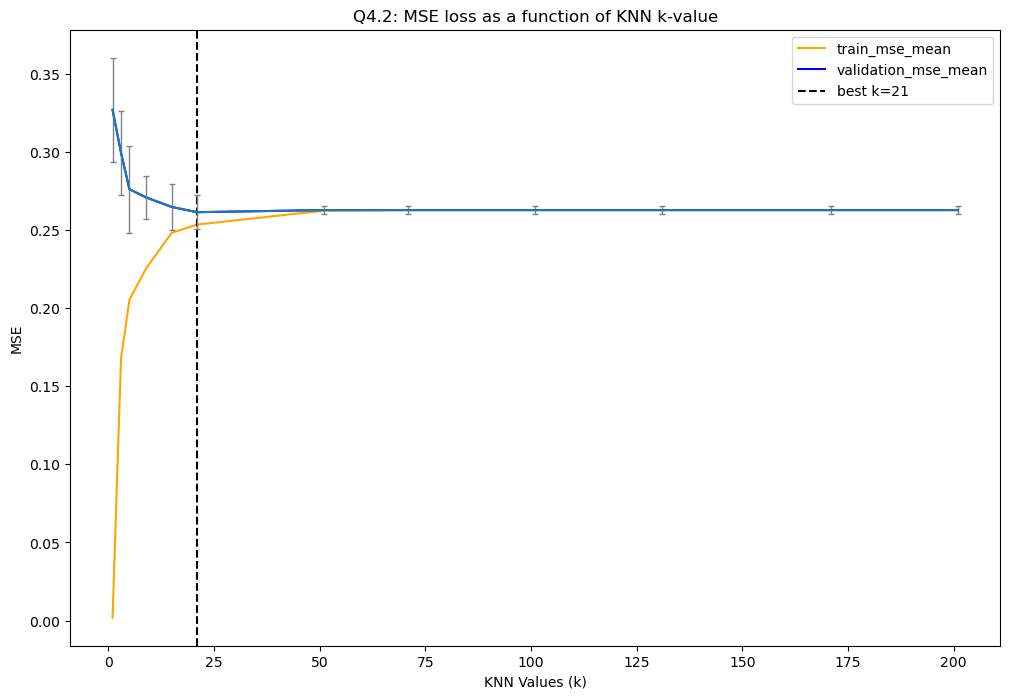

In [485]:
# Plot cross-validation results
# Plotting training and testing dataset with regression line
plt.figure(figsize=(12,8))
plt.plot(ks, train_mses_mean, label='train_mse_mean', color='orange')
plt.plot(ks, val_mses_mean, label='validation_mse_mean', color='blue')
# plt.yscale("log")
plt.axvline(best_k, c='k', ls='--', label=rf'best k={best_k}')
plt.xlabel(r'KNN Values (k)')
plt.ylabel('MSE')
plt.title('Q4.2: MSE loss as a function of KNN k-value')
plt.legend()
plt.errorbar(ks, val_mses_mean, yerr=val_mses_std, ecolor='grey', elinewidth=1, capsize=2.5)
plt.show()

In [486]:
print(
    "The classification accuracies for 'knn_model' where k={} "
    "are:\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(
        best_k, knn_train_acc, knn_test_acc
    )
)

# create dict for storing test scores for each Q4 model
q4_test_scores = {"knn_model": knn_test_acc}
q4_train_scores = {"knn_model": knn_train_acc}

The classification accuracies for 'knn_model' where k=21 are:

	Train	0.7447
	TEST	0.7013


<!-- END QUESTION -->

<div class='exercise-r'>

**Q4.3** Fit the full logistic regression model (without penalty) with main effects of all 12 predictors in it (call it `logit_full`). Store the classification accuracy on train and test for this model in `logit_full_train_acc` and `logit_full_test_acc`.

**HINT:** If you have convergence warnings, increasing the maximum number of iterations will likely solve this issue.
    
</div>

_Points:_ 3

In [487]:
# The code that prints your results assumes
# predictors were given to the model in this order
predictor_list = [
    "test_score", "ap", "avg_ap", "sat_subjects",
    "gpa", "female", "minority", "international",
    "sports", "harvard", "early_app", "alumni",
]

In [488]:
X_train[predictor_list]

,test_score,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,harvard,early_app,alumni
584,-0.620,0.670,0.398,0.881,0.108,1,0,0,0,1,1,0
1817,0.026,1.099,-0.034,0.105,0.460,1,0,0,0,0,0,0
1308,-0.268,-0.616,0.456,0.105,-0.896,0,0,0,0,0,0,0
1336,-0.385,1.099,-0.230,0.105,0.610,1,0,0,0,0,1,0
3,1.261,0.670,0.751,1.656,0.610,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0.262,-0.616,0.456,0.105,0.610,1,0,0,0,0,0,0
368,0.262,0.670,0.633,-0.670,0.610,0,0,0,0,1,1,0
648,-0.973,-1.473,-2.191,0.105,0.610,1,0,1,0,1,0,1
121,0.909,-1.473,-2.191,-0.670,0.610,0,0,0,0,1,0,0


In [489]:
# your code here
X_train = college_train[predictor_list]
X_test = college_test[predictor_list]
y_train = college_train["admitted"]
y_test = college_test["admitted"]

# scale non_binary predictors
non_binary_predictors = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa"]

# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit(X_train[non_binary_predictors])

# Use your train-fitted scaler to transform both X train and X test
X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])

logit_full = LogisticRegression(penalty='none', max_iter = 1000).fit(X_train, y_train)

#Predict
y_pred_train = logit_full.predict(X_train)
y_pred_test = logit_full.predict(X_test)

logit_full_train_acc = accuracy_score(y_train, y_pred_train)
logit_full_test_acc = accuracy_score(y_test, y_pred_test)

C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\1782036842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\1782036842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


In [490]:
# display your results
print(
    "The intercept and coefficients for the 'logit_full' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_full.intercept_).flatten()[0]
    )
)

for predictor, coef in zip(predictor_list, logit_full.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_full' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_full_train_acc, logit_full_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_full"] = logit_full_test_acc
q4_train_scores["logit_full"] = logit_full_train_acc

The intercept and coefficients for the 'logit_full' model are:

	intercept           -1.7090
	test_score          0.7838
	ap                  -0.1403
	avg_ap              0.0975
	sat_subjects        -0.0952
	gpa                 0.1056
	female              0.0518
	minority            0.9165
	international       0.4500
	sports              1.2334
	harvard             0.2581
	early_app           0.3737
	alumni              0.6629

The classification accuracies for 'logit_full' are:

	Train	0.7453
	TEST	0.7147


In [491]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<div class='exercise-r'>

**Q4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Store the classification accuracy on train and test for this model in `logit_lasso_train_acc` and `logit_lasso_test_acc`.

</div>

_Points:_ 4

In [492]:
X_train = college_train[predictor_list]
X_test = college_test[predictor_list]
y_train = college_train["admitted"]
y_test = college_test["admitted"]

# scale non_binary predictors
non_binary_predictors = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa"]

# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit(X_train[non_binary_predictors])

# Use your train-fitted scaler to transform both X train and X test
X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])

C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\1502113757.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\1502113757.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


In [493]:
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 3
penalty = 'l1'
solver = 'liblinear'

logit_lasso = LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(X_train, y_train)

logit_lasso_train_acc = logit_lasso.score(X_train, y_train)
logit_lasso_test_acc = logit_lasso.score(X_test, y_test)

In [494]:
# Display your results
print(
    "The intercept and coefficients for the 'logit_lasso' model are:"
    "\n\n\t{:<20}{:.4f}".format(
        "intercept", np.array(logit_lasso.intercept_).flatten()[0]
    )
)

# Again, this code assumes predictors were given to the model
# in the order defined in `predictor_list`
for predictor, coef in zip(predictor_list, logit_lasso.coef_.flatten()):
    print("\t{:<20}{:.4f}".format(predictor, coef))

print(
    "\nThe classification accuracies for 'logit_lasso' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(logit_lasso_train_acc, logit_lasso_test_acc)
)

# store test score to dict for later use
q4_test_scores["logit_lasso"] = logit_lasso_test_acc
q4_train_scores["logit_lasso"] = logit_lasso_train_acc

The intercept and coefficients for the 'logit_lasso' model are:

	intercept           -1.7011
	test_score          0.7819
	ap                  -0.1388
	avg_ap              0.0952
	sat_subjects        -0.0943
	gpa                 0.1045
	female              0.0491
	minority            0.9120
	international       0.4403
	sports              1.2213
	harvard             0.2544
	early_app           0.3700
	alumni              0.6562

The classification accuracies for 'logit_lasso' are:

	Train	0.7453
	TEST	0.7147


In [495]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<div class='exercise-r'>

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? Please remember that, as a general practice, zero-value Lasso coefficients (i.e. $\beta_i=0$) are considered "unimportant". Store your results in `predictors_important` and `predictors_not_important`.
 
</div>

_Points:_ 3

In [496]:
# pd.DataFrame(zip(predictor_list, logit_lasso.coef_.flatten()), columns=["Predictors","Coefficient"])
list(zip(predictor_list, logit_lasso.coef_.flatten()))

[('test_score', 0.7818896727487106),
 ('ap', -0.13875027929447895),
 ('avg_ap', 0.09519351986963881),
 ('sat_subjects', -0.09432375141734753),
 ('gpa', 0.10453626651256194),
 ('female', 0.0491499120202736),
 ('minority', 0.9119747353939811),
 ('international', 0.44032922005913283),
 ('sports', 1.2213047743233063),
 ('harvard', 0.25437904633661845),
 ('early_app', 0.3700282521737498),
 ('alumni', 0.6562321632463909)]

In [497]:
# your code here
imp = []
non_imp = [] 
for i, coef in enumerate(logit_lasso.coef_.flatten()):
    if coef != 0:
        imp.append(predictor_list[i])
    else:
        non_imp.append(predictor_list[i])

predictors_important = imp
predictors_not_important = non_imp

In [498]:
# display results
print(
    "The following predictors were deemed important by "
    "'logit_lasso' (i.e. coef != 0):\n\n\t{}\n\n\n"
    "While, the remaining were deemed unimportant (i.e. "
    "coef == 0):\n\n\t{}"
    .format(
        predictors_important,
        predictors_not_important,
    )
)

The following predictors were deemed important by 'logit_lasso' (i.e. coef != 0):

	['test_score', 'ap', 'avg_ap', 'sat_subjects', 'gpa', 'female', 'minority', 'international', 'sports', 'harvard', 'early_app', 'alumni']


While, the remaining were deemed unimportant (i.e. coef == 0):

	[]


In [499]:
grader.check("q4.5")

q4.5 results: All test cases passed!

<div class='exercise-r'>

**Q4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the unique 2-way interactions between them (call it `lasso_interact`).  Again use `Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]` and 10-fold cross-validation with classification accuracy as the scoring metric. Record the accuracy on train and test for this model in `lasso_interact_train_acc` and `lasso_interact_test_acc`.

</div>

_Points:_ 4

In [500]:
X_train = college_train[predictor_list]
X_test = college_test[predictor_list]
y_train = college_train["admitted"]
y_test = college_test["admitted"]

# scale non_binary predictors
non_binary_predictors = ["test_score", "ap", "avg_ap", "sat_subjects", "gpa"]

# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit(X_train[non_binary_predictors])

# Use your train-fitted scaler to transform both X train and X test
X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\3726512184.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[non_binary_predictors] = scaler.transform(X_train[non_binary_predictors])
C:\Users\sykri\AppData\Local\Temp\ipykernel_6120\3726512184.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[non_binary_predictors] = scaler.transform(X_test[non_binary_predictors])


In [501]:
# Get interaction terms
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# make into DataFrame
X_poly_train_df = pd.DataFrame(X_poly_train, columns=poly.get_feature_names_out())
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names_out())

In [502]:
# your code here
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 10
penalty = 'l1'
solver = 'liblinear'

lasso_interact = LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(X_poly_train_df, y_train)

lasso_interact_train_acc = lasso_interact.score(X_poly_train_df, y_train)
lasso_interact_test_acc = lasso_interact.score(X_poly_test_df, y_test)

In [503]:
print(
    "\nThe classification accuracies for 'logit_lasso_interact' are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(lasso_interact_train_acc, lasso_interact_test_acc)
)

# store test score to dict for later use
q4_test_scores["lasso_interact"] = lasso_interact_test_acc
q4_train_scores["lasso_interact"] = lasso_interact_train_acc


The classification accuracies for 'logit_lasso_interact' are:

	Train	0.7647
	TEST	0.7040



<div class='exercise-r'>

**Q4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? Store these numbers in `num_important_coefs` and `num_unimportant_coefs`. 
    
</div>

_Points:_ 2

In [504]:
# your code here
imp = []
non_imp = [] 
col_headers = X_poly_train_df.columns
for i, coef in enumerate(lasso_interact.coef_.flatten()):
    if coef != 0:
        imp.append(col_headers[i])
    else:
        non_imp.append(col_headers[i])

num_important_coefs = len(imp)
num_unimportant_coefs = list(lasso_interact.coef_.flatten()).count(0)

In [505]:
list(lasso_interact.coef_.flatten()).count(0)

18

In [506]:
print(
    "Of the {} predictors used in our 'logit_lasso_interact' model:"
    "\n\n\t{} predictors were deemed 'important' by our model"
    "\n\t{} predictors were deemed 'unimportant' with 0-valued "
    "coefficients".format(
        num_important_coefs + num_unimportant_coefs,
        num_important_coefs,
        num_unimportant_coefs
    )
)

Of the 78 predictors used in our 'logit_lasso_interact' model:

	60 predictors were deemed 'important' by our model
	18 predictors were deemed 'unimportant' with 0-valued coefficients


---

<a id="part5"></a>

## <div class='exercise'>Question 5: Evaluating results [12 pts]</div>

[Return to contents](#contents)

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.1** Which of the 4 models in Question 4 performs the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in Question 1.1? What does this comparison to the "naive" model tell us?
    
</div>

_Points:_ 2.5

In [507]:
# your code here
print("The TEST accuracies for the 4 models in Q4 are:\n")
for key, value in q4_test_scores.items():
    print("\t{:<25}{:.4f}".format(key, value))
print(
    "\nThe TEST accuracy for our original baseline \"naive\" "
    "model was {:.4f}".format(naive_test_acc)
)

The TEST accuracies for the 4 models in Q4 are:

	knn_model                0.7013
	logit_full               0.7147
	logit_lasso              0.7147
	lasso_interact           0.7040

The TEST accuracy for our original baseline "naive" model was 0.7013


The best model(s) based on classification accuracy are `logit_full` and `logit_lasso`, followed by `lasso_interact`. All three models are improvements over the "naive" model. In all cases, these improvements are marginal. The equal accuracies between `logit_full` and `logit_lasso` suggest that adding a regularization term does NOT improve the model, and adding interaction terms slightly worsens the accuracy closer to the "naive" model.

The worst model is `knn_model`, which performs equally as the "naive" model. This means that predictions by `knn_model` is no better than assigning the same value to all datapoints. Revisiting the MSE plots shows high MSE standard deviation for training data at the best k that overlaps with poorer ks - supporting this model's unreliability in predicting admission.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in Question 5.1 is better than the worst model identified in 5.1?  How do you know?
    
</div>

_Points:_ 4.5

The ROC curves do support the best models identified in Question 5.1. In plot Q5.2.4 below, ROC plots for `logit_full` and `logit_lasso` seem to overlap each other. Overall, the ROC curves support the the best model identified in Question 5.1 is better than the worst model. When overlaid with the 2 other worse models, it can be observed regions where `logit_full` and `logit_lasso` curves are higher up the y-axis than the other 2 models, suggesting more Area Under the Curve (AUC). 

The `knn model` (worst model) has a clear underperforming region at FPRs between 0.4 and 0.7. KNN's performance is equal to the "naive' model, but is still slightly better than chance - this is suspicious because it suggests a bias in the data (in this case, a bias against admission). This bias gives the "naive" and knn model has a higher probability of correctly classifying admission.

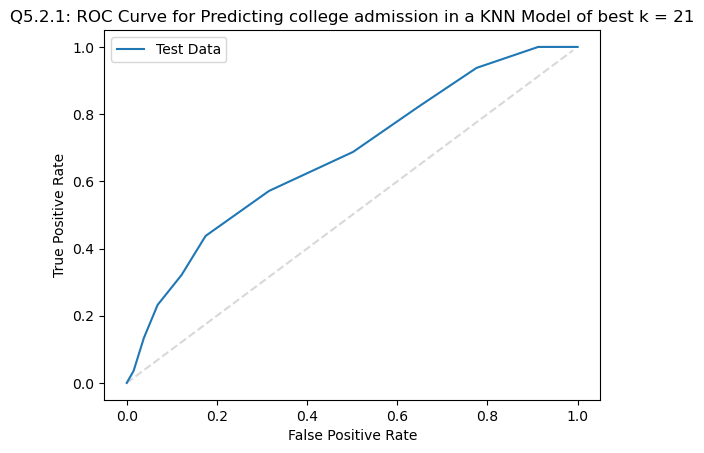

In [508]:
# KNN Model
# Plot the ROC curve
# model_ks[best_idx] was used for KNN model
yhat_knn = model_ks[best_idx].predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat_knn)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr,label="Test Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"Q5.2.1: ROC Curve for Predicting college admission in a KNN Model of best k = {ks[best_idx]}")
plt.legend()
plt.show()

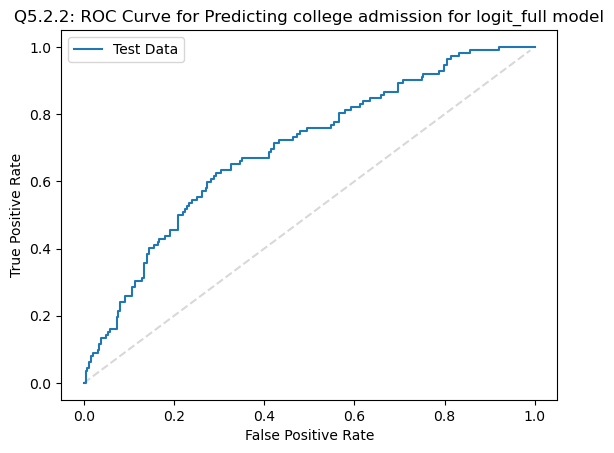

In [509]:
# Logit Full
# Plot the ROC curve
yhat_logit_full = logit_full.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat_logit_full)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr,label="Test Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"Q5.2.2: ROC Curve for Predicting college admission for logit_full model")
plt.legend()
plt.show()

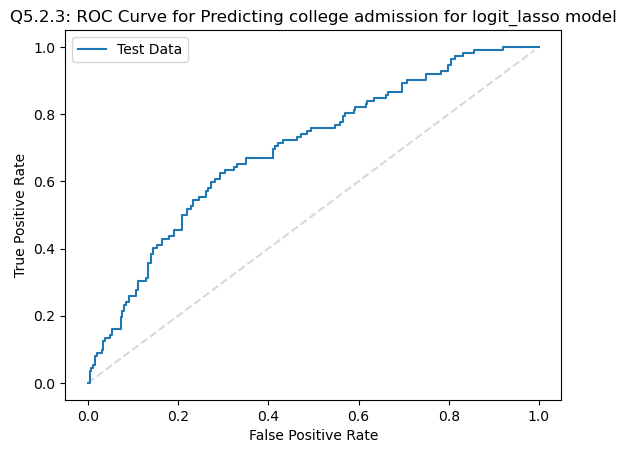

In [510]:
# Logit Full
# Plot the ROC curve
yhat_logit_lasso = logit_lasso.predict_proba(X_test)[:,1]

fpr1, tpr1, thresholds1 = roc_curve(y_test, yhat_logit_lasso)


x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr1,tpr1,label="Test Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"Q5.2.3: ROC Curve for Predicting college admission for logit_lasso model")
plt.legend()
plt.show()

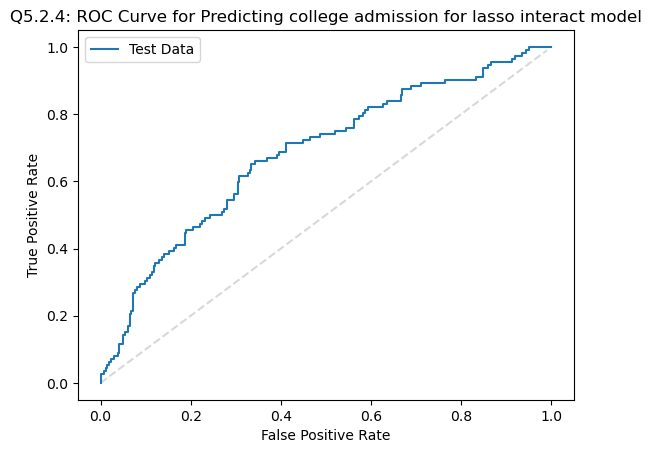

In [511]:
# Logit Full
# Plot the ROC curve
yhat_lasso_interact = lasso_interact.predict_proba(X_poly_test_df)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, yhat_lasso_interact)


x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr,label="Test Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"Q5.2.4: ROC Curve for Predicting college admission for lasso interact model")
plt.legend()
plt.show()

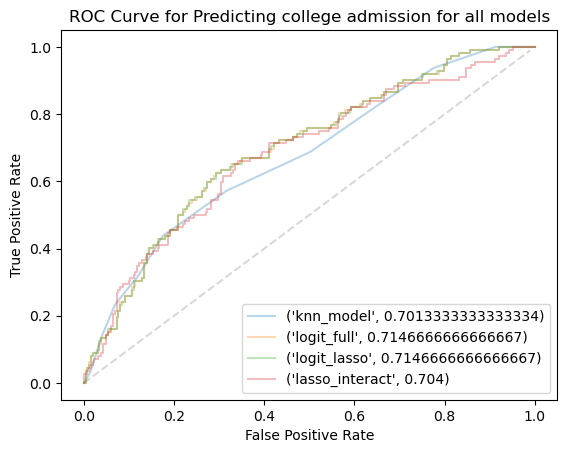

In [512]:
# All Four on the same plot
# Plot the ROC curve

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn)
fpr_logit_full, tpr_logit_full, thresholds_logit_full, = roc_curve(y_test, yhat_logit_full)
fpr_logit_lasso, tpr_logit_lasso, thresholds_logit_lasso, = roc_curve(y_test, yhat_logit_lasso)
fpr_lasso_interact, tpr_lasso_interact, thresholds_lasso_interact, = roc_curve(y_test, yhat_lasso_interact)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr_knn, tpr_knn,alpha=0.3,label=list(q4_test_scores.items())[0])
plt.plot(fpr_logit_full, tpr_logit_full,alpha=0.3,label=list(q4_test_scores.items())[1])
plt.plot(fpr_logit_lasso, tpr_logit_lasso,alpha=0.3,label=list(q4_test_scores.items())[2])
plt.plot(fpr_lasso_interact, tpr_lasso_interact,alpha=0.3,label=list(q4_test_scores.items())[3])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"ROC Curve for Predicting college admission for all models")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**5.3** Calculate the AUC for all 4 models and store these in `auc_list`. **The order of AUCs in the list should match the order of the model as they appear in `q4_test_scores`.**
    
Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
    
</div>

_Points:_ 3

Yes, the rankings of these 4 models based on AUC match classification accuracy. This makes sense because AUC and ROC are connected: better accuracies == better TPR over FPR and probability of classifying admission (ROC curve), which in turn == higher measure of separability (AUC)

In [513]:
q4_test_scores

{'knn_model': 0.7013333333333334,
 'logit_full': 0.7146666666666667,
 'logit_lasso': 0.7146666666666667,
 'lasso_interact': 0.704}

In [514]:
# your code here
# calculate each model's AUC using its ROC fpr and tpr
auc_list = [
    roc_auc_score(y_test,yhat_knn),
    roc_auc_score(y_test,yhat_logit_full),
    roc_auc_score(y_test, yhat_logit_lasso),
    roc_auc_score(y_test,yhat_lasso_interact),
    ]

In [515]:
auc_list

[0.6737167300380228,
 0.6964964693101575,
 0.6965643671917436,
 0.6826113525258012]

In [516]:
print(
    "The TEST accuracies vs. AUC scores for the 4 models in Q4 are:"
    "\n\n\t\t\t\tAccuracy\tAUC"
)
for (key, value), auc_value in zip(q4_test_scores.items(), auc_list):
    print("\t{:<24}{:.4f}\t\t{:.4f}".format(key, value, auc_value))

The TEST accuracies vs. AUC scores for the 4 models in Q4 are:

				Accuracy	AUC
	knn_model               0.7013		0.6737
	logit_full              0.7147		0.6965
	logit_lasso             0.7147		0.6966
	lasso_interact          0.7040		0.6826


In [517]:
grader.check("q5.3")

q5.3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise-r'>

**Q5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use and why?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
    
</div>

_Points:_ 2

In [518]:
print(
    "The TRAIN, TEST accuracies, AUC scores for the 4 models in Q4 are:"
    "\n\n\t\t\t\tTrain Accuracy\tTest Accuracy\tAUC"
)
for (key1, value1), (key2, value2), auc_value in zip(q4_train_scores.items(), q4_test_scores.items(), auc_list):
    print("\t{:<24}{:.4f}\t\t{:.4f}\t\t{:.4f}".format(key1, value1, value2, auc_value))

The TRAIN, TEST accuracies, AUC scores for the 4 models in Q4 are:

				Train Accuracy	Test Accuracy	AUC
	knn_model               0.7447		0.7013		0.6737
	logit_full              0.7453		0.7147		0.6965
	logit_lasso             0.7453		0.7147		0.6966
	lasso_interact          0.7647		0.7040		0.6826


I would use `logit_lasso` model. Firstly, the `lasso_full` model is an improvement over knn. Including lasso-like regularization did not yield any improvement in accuracy - which is suspicious, as it suggests there are other variables unaccounted for. However, this model is better than `lasso_interact`, which seems to be the most overfitted model - largest gap between train and test accuracies. The regularization aspect is important to penalize large coefficients.

The biggest issue if this was a publicly available tool is that it has a relatively low accuracy rate of ~70%  for predicting admission into Yale! Additionally, the higher train accuracies over test suggest that the model is slightly overfitted. Perhaps we can eliminate predictors to reduce the overfitting issue.

Additionally, another issue for these models is that there seems to be a weak correlation between `test_score` and `avg_ap`, suggesting multicollinearity, which could increase the standard error of predicted coefficients. This is not solved by regularization, inclusion of all predictors, and interaction terms in the `lasso_interact model`. 

Also, another important component of college applications is their personal statement, which isn't captured by the dataset. There might even be more unknown predictors unaccounted for. 

<!-- END QUESTION -->

**This concludes HW5. Thank you!**

[Return to contents](#contents)